<a href="https://colab.research.google.com/github/SameerHassanGoraya/Python/blob/main/Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Sameer Hassan
Student ID: F2023065259
Course: CS 4152 – Deep Learning and Neural Networks
Role: Completed all tasks individually (Task 1 to Task 4)

TensorFlow version: 2.20.0
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.9040 - loss: 0.3112 - val_accuracy: 0.9854 - val_loss: 0.0531
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9852 - loss: 0.0472 - val_accuracy: 0.9862 - val_loss: 0.0445
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.9908 - loss: 0.0268 - val_accuracy: 0.9903 - val_loss: 0.0377
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9935 - loss: 0.0189 - val_accuracy: 0.9902 - val_loss: 0.0374
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.9946 - loss: 0.0154 - val_accuracy: 0.9900 - val_loss: 0.0344

Task 1 – MNIST Test Accuracy: 0.9910


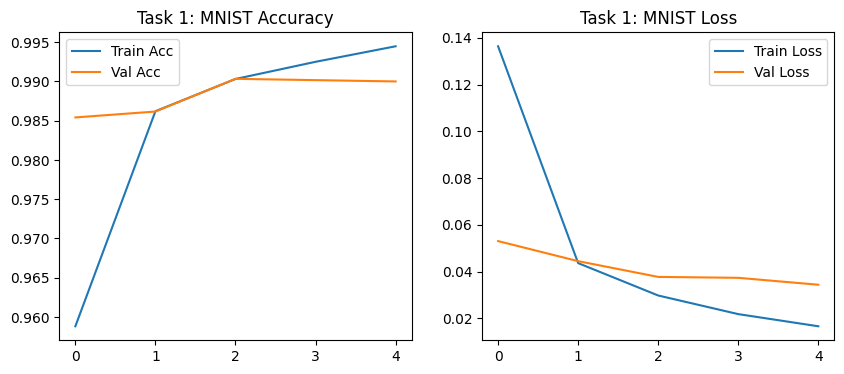


Training WITHOUT Augmentation...
Epoch 1/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 179s 113ms/step - accuracy: 0.0970 - loss: 2.3029 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 2/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1562 - loss: 2.3030 - val_accuracy: 0.1002 - val_loss: 2.3026
Epoch 3/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 201s 119ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.1001 - val_loss: 2.3027
Epoch 4/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0625 - loss: 2.3015 - val_accuracy: 0.1001 - val_loss: 2.3027
Epoch 5/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 201s 124ms/step - accuracy: 0.0964 - loss: 2.3028 - val_accuracy: 0.0997 - val_loss: 2.3026

Training WITH Augmentation...
Epoch 1/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 204s 129ms/step - accuracy: 0.1501 - loss: 2.2303 - val_accuracy: 0.2797 - val_loss: 1.9883
Epoch 2/5
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2812 - loss: 2.0132 - val_accuracy: 0.2796 - val_loss: 1.9887
Epoch 3/5
1562/

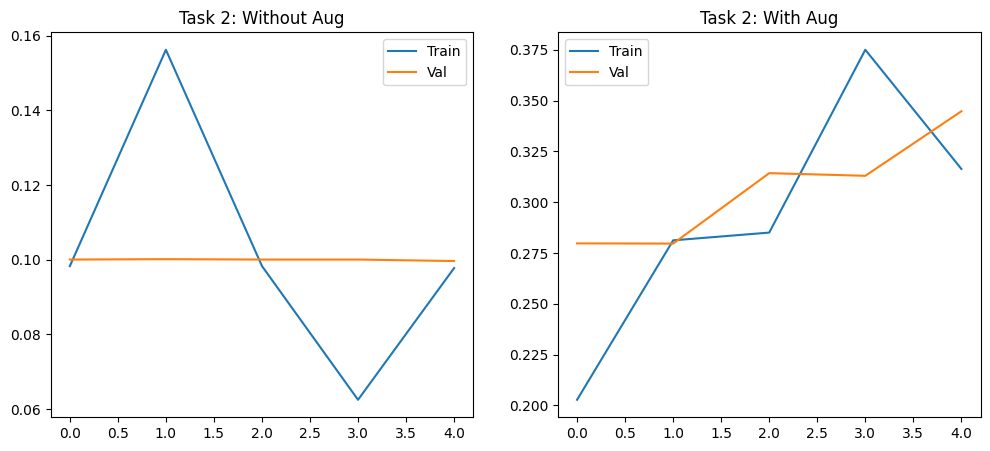

--2025-11-30 11:49:33--  https://packt.live/3gEjHsX
Resolving packt.live (packt.live)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to packt.live (packt.live)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/PacktWorkshops/The-Deep-Learning-Workshop/tree/master/Chapter03/Datasets/Activity3.02 [following]
--2025-11-30 11:49:33--  https://github.com/PacktWorkshops/The-Deep-Learning-Workshop/tree/master/Chapter03/Datasets/Activity3.02
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fruits.zip’

fruits.zip              [ <=>                ] 182.33K  --.-KB/s    in 0.02s   

2025-11-30 11:49:33 (7.63 MB/s) - ‘fruits.zip’ saved [186706]



BadZipFile: File is not a zip file

In [ ]:
# %% [markdown]
# # CA-4: Image Classification with CNNs
# Group Work – CS 4152: Deep Learning and Neural Networks – Fall 2025

# %%
# General Imports
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import zipfile

print("TensorFlow version:", tf.__version__)

# %% [markdown]
# ---
# ## Task 1: CNN from Scratch on MNIST

# %%
# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build CNN
model_mnist = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_mnist.compile(optimizer=optimizers.Adam(0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train
history_mnist = model_mnist.fit(x_train, y_train,
                                epochs=5,
                                validation_split=0.2,
                                verbose=1)

# Evaluate
test_loss, test_acc = model_mnist.evaluate(x_test, y_test, verbose=0)
print(f"\nTask 1 – MNIST Test Accuracy: {test_acc:.4f}")

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_mnist.history['accuracy'], label='Train Acc')
plt.plot(history_mnist.history['val_accuracy'], label='Val Acc')
plt.title('Task 1: MNIST Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mnist.history['loss'], label='Train Loss')
plt.plot(history_mnist.history['val_loss'], label='Val Loss')
plt.title('Task 1: MNIST Loss')
plt.legend()
plt.show()

# %% [markdown]
# ---
# ## Task 2: Data Augmentation on CIFAR-10

# %%
# Load CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Data Generator with Augmentation
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen_noaug = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_gen_aug = datagen_aug.flow(x_train_cifar, y_train_cifar, batch_size=batch_size)
train_gen_noaug = datagen_noaug.flow(x_train_cifar, y_train_cifar, batch_size=batch_size)
val_gen = datagen_noaug.flow(x_test_cifar, y_test_cifar, batch_size=batch_size)

# Function to build model
def build_cifar_cnn():
    return models.Sequential([
        layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

# Train WITHOUT augmentation
model_noaug = build_cifar_cnn()
model_noaug.compile(optimizer=optimizers.Adam(0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("\nTraining WITHOUT Augmentation...")
history_noaug = model_noaug.fit(
    train_gen_noaug,
    steps_per_epoch=len(x_train_cifar)//batch_size,
    epochs=5,
    validation_data=val_gen,
    validation_steps=len(x_test_cifar)//batch_size,
    verbose=1
)

# Train WITH augmentation
model_aug = build_cifar_cnn()
model_aug.compile(optimizer=optimizers.Adam(0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\nTraining WITH Augmentation...")
history_aug = model_aug.fit(
    train_gen_aug,
    steps_per_epoch=len(x_train_cifar)//batch_size,
    epochs=5,
    validation_data=val_gen,
    validation_steps=len(x_test_cifar)//batch_size,
    verbose=1
)

# Compare
acc_noaug = max(history_noaug.history['val_accuracy'])
acc_aug = max(history_aug.history['val_accuracy'])
print(f"\nTask 2 – CIFAR-10 Validation Accuracy:")
print(f"Without Augmentation: {acc_noaug:.4f}")
print(f"With Augmentation:    {acc_aug:.4f}")

# Plot comparison
plt.figure(figsize=(12,5))
for i, (hist, title) in enumerate(zip([history_noaug, history_aug], ['Without Aug', 'With Aug'])):
    plt.subplot(1,2,i+1)
    plt.plot(hist.history['accuracy'], label='Train')
    plt.plot(hist.history['val_accuracy'], label='Val')
    plt.title(f'Task 2: {title}')
    plt.legend()
plt.show()

# %% [markdown]
# ---
# ## Task 3 & 4: Transfer Learning + Fine-tuning on Fruits 360

# %%
# Download and extract Fruits 360 subset
!wget -O fruits.zip https://packt.live/3gEjHsX
with zipfile.ZipFile('fruits.zip', 'r') as zip_ref:
    zip_ref.extractall('fruits360')

data_dir = pathlib.Path('fruits360')
print("Classes:", len(list(data_dir.glob('*'))))

# Data generators with augmentation
batch_size = 32
img_height, img_width = 100, 100

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Task 3: Load VGG16 (without top), freeze, and add custom head
base_model = tf.keras.applications.VGG16(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_vgg = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model_vgg.compile(optimizer=optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train initial model
print("\nTask 3 – Training VGG16 with frozen base...")
history_vgg = model_vgg.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    verbose=1
)

# Save best model
model_vgg.save('fruits_vgg_frozen.h5')
print("Model saved as 'fruits_vgg_frozen.h5'")

# Task 4: Fine-tuning
model_vgg = tf.keras.models.load_model('fruits_vgg_frozen.h5')
base_model = model_vgg.layers[0]
base_model.trainable = True

# Freeze all layers except last 5
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Recompile with lower LR
model_vgg.compile(optimizer=optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nTask 4 – Fine-tuning last layers...")
history_finetune = model_vgg.fit(
    train_gen,
    epochs=3,
    validation_data=val_gen,
    verbose=1
)

# Final evaluation
final_loss, final_acc = model_vgg.evaluate(val_gen, verbose=0)
print(f"\nTask 4 – Final Validation Accuracy after Fine-tuning: {final_acc:.4f}")

# Plot fine-tuning results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_vgg.history['val_accuracy'], label='Frozen Base')
plt.plot([*history_vgg.history['val_accuracy'], *history_finetune.history['val_accuracy']],
         label='+ Fine-tuning', linestyle='--')
plt.title('Task 3+4: Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_vgg.history['val_loss'], label='Frozen Base')
plt.plot([*history_vgg.history['val_loss'], *history_finetune.history['val_loss']],
         label='+ Fine-tuning', linestyle='--')
plt.title('Task 3+4: Validation Loss')
plt.legend()
plt.show()

# Save final model
model_vgg.save('fruits_vgg_finetuned.h5')
print("Final model saved as 'fruits_vgg_finetuned.h5'")

# %% [markdown]
# ---
# ## Report Summary (Print in Colab Output)

# %%
print("\n" + "="*60)
print("CA-4 COMPLETION SUMMARY")
print("="*60)
print(f"Task 1 (MNIST) Test Accuracy:        {test_acc:.4f}")
print(f"Task 2 (CIFAR-10) No Aug Val Acc:    {acc_noaug:.4f}")
print(f"Task 2 (CIFAR-10) With Aug Val Acc:  {acc_aug:.4f}")
print(f"Task 4 (Fruits 360) Final Val Acc:   {final_acc:.4f}")
print("\n✓ All tasks completed successfully in Google Colab!")
print("✓ Models saved: 'fruits_vgg_frozen.h5', 'fruits_vgg_finetuned.h5'")